## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [2]:
#3 Look at the data types of the columns
import pandas as pd
df = pd.read_csv('Housing.csv')
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [3]:
#4 Check for missing  values if any, replace with appropriate values

#You can replace missing values using the .fillna() method. 

print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [4]:
# Import necessary library
# Example Usage

import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'Name': ['Alice', 'Bob', None, 'David'],
    'Age': [25, None, 30, 22],
    'Salary': [50000, 60000, None, 52000]
}

df = pd.DataFrame(data)

# Check for missing values
print("Missing values before filling:\n", df.isnull().sum())

# Replace missing values
# You can use different strategies depending on the column type
df['Name'].fillna('Unknown', inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)

# Check again
print("\nMissing values after filling:\n", df.isnull().sum())
print("\nUpdated DataFrame:\n", df)


Missing values before filling:
 Name      1
Age       1
Salary    1
dtype: int64

Missing values after filling:
 Name      0
Age       0
Salary    0
dtype: int64

Updated DataFrame:
       Name        Age   Salary
0    Alice  25.000000  50000.0
1      Bob  25.666667  60000.0
2  Unknown  30.000000  52000.0
3    David  22.000000  52000.0


/tmp/ipykernel_4953/1843504655.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna('Unknown', inplace=True)
/tmp/ipykernel_4953/1843504655.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)

import pandas as pd


df = pd.read_csv('Housing.csv') 

# Using iloc to separate independent (X) and dependent (y) variables
X = df.iloc[:, 1:]  # Selecting all columns except the first (price) => more than 1 independent
y = df.iloc[:, 0]   # Selecting only the first column (price) => one dependent

# Check the shapes of X and y
print("Shape of X (independent variables):", X.shape)
print("Shape of y (dependent variable):", y.shape)



Shape of X (independent variables): (545, 12)
Shape of y (dependent variable): (545,)


/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


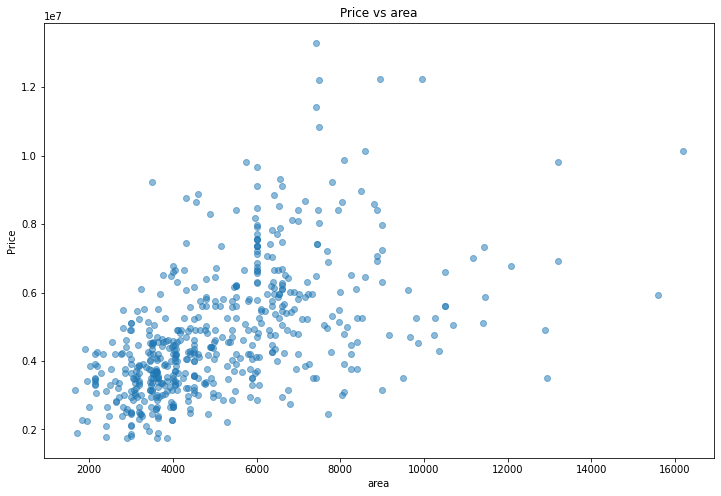

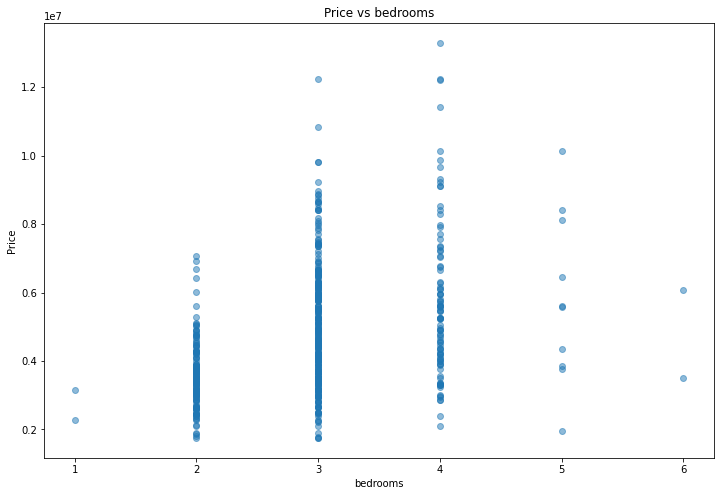

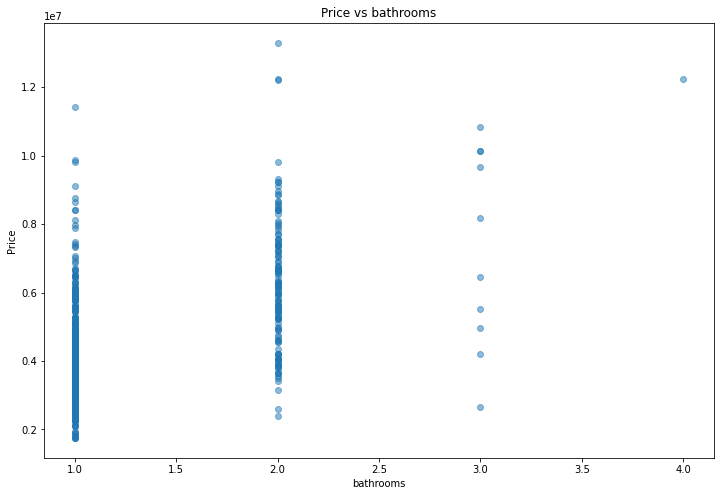

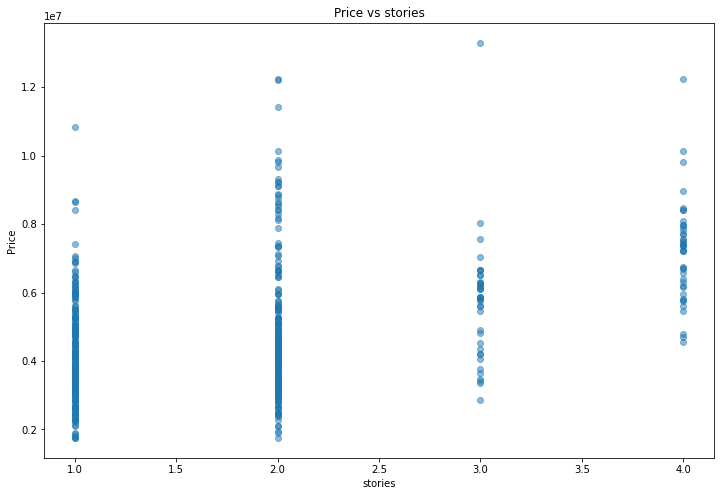

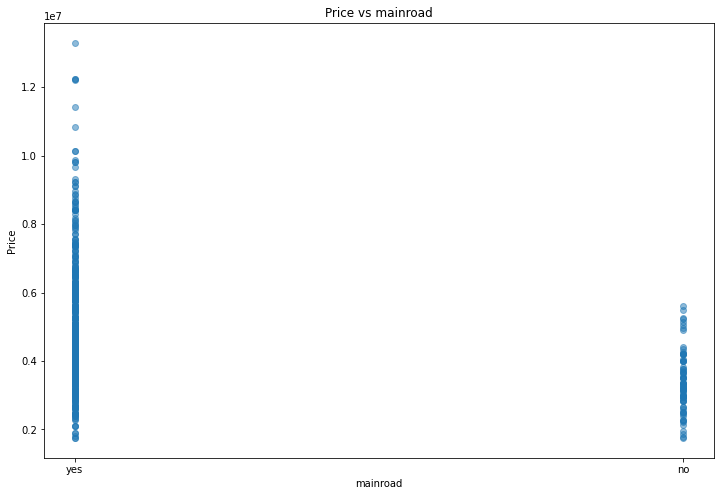

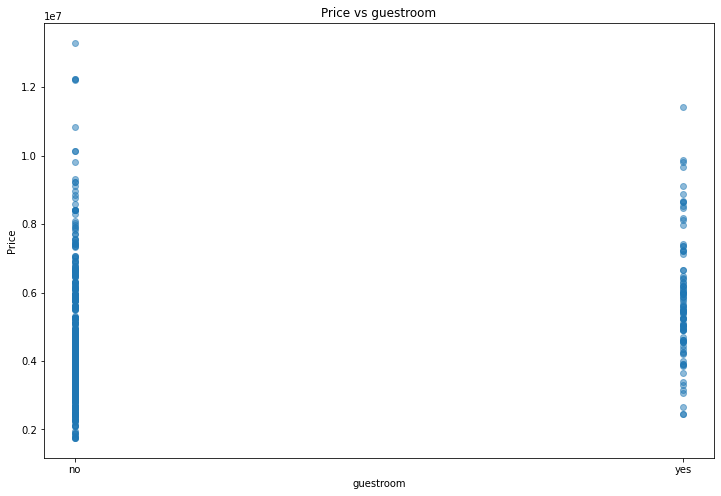

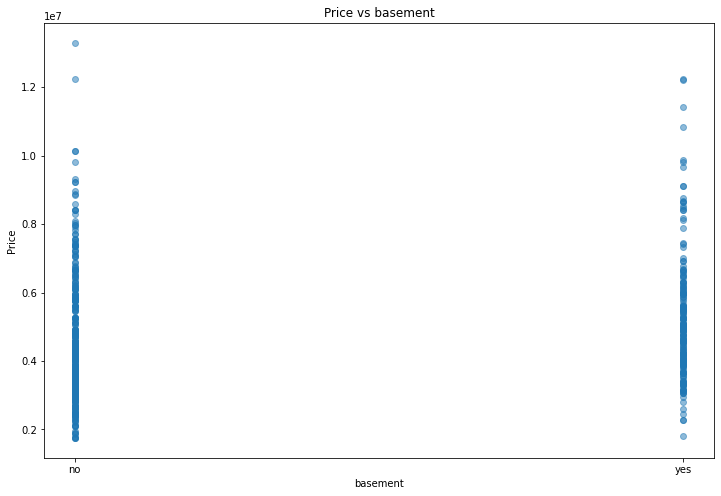

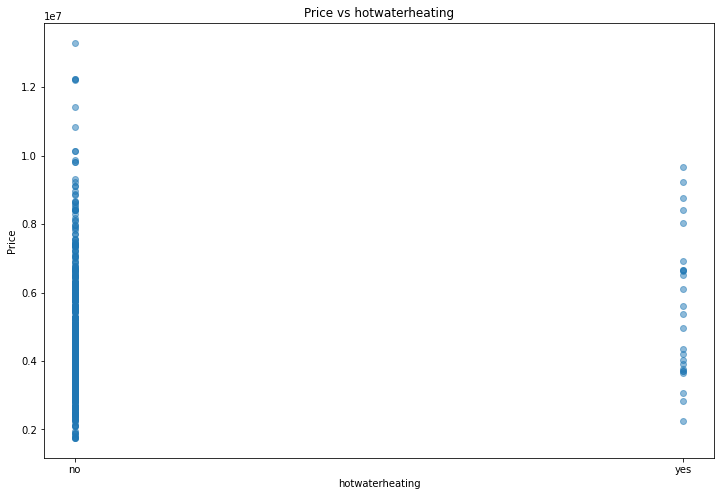

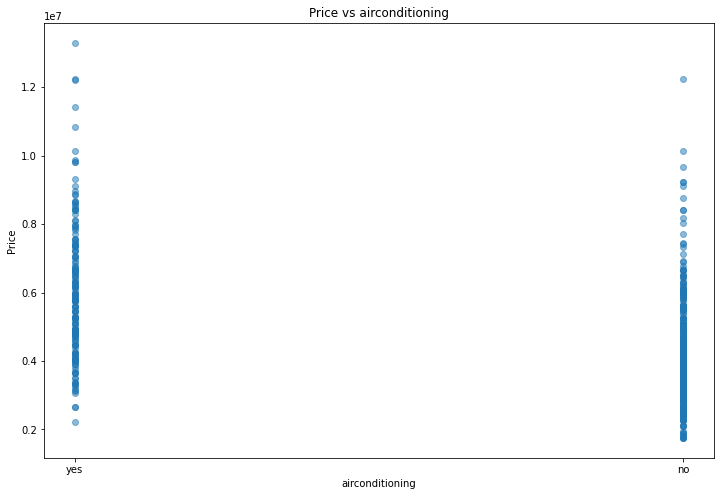

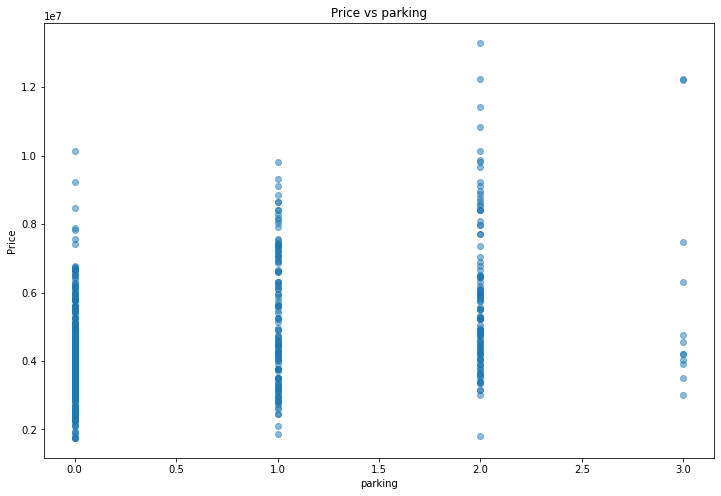

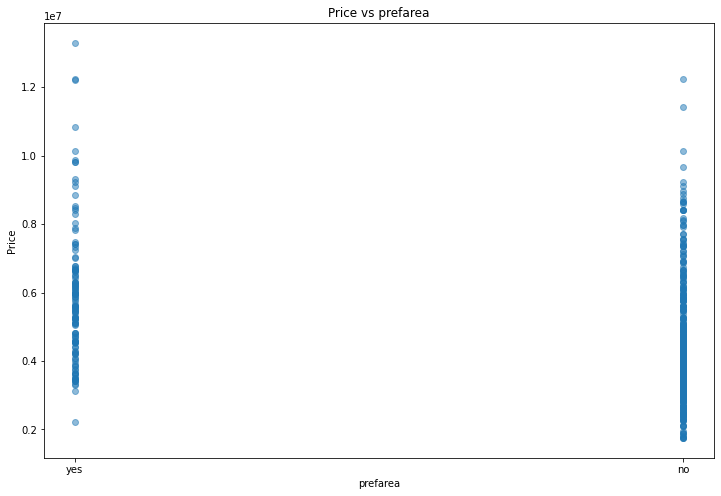

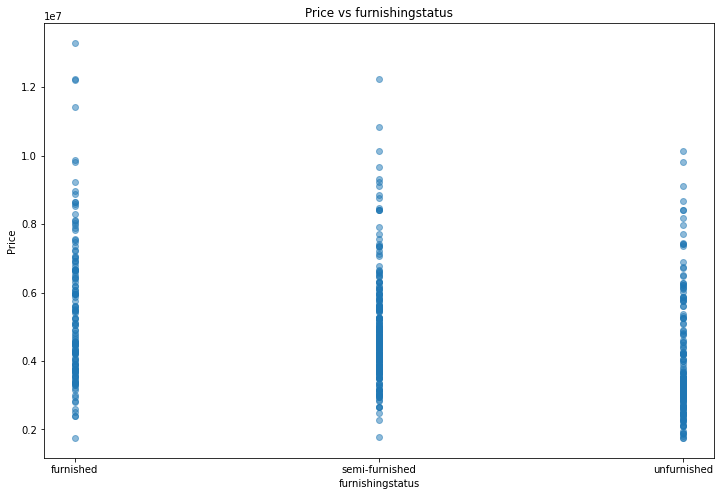

In [1]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Housing.csv")

# Separate independent (X) and dependent (y) variables
X = df.iloc[:, 1:]  # All columns except 'price'  (indepndent)
y = df.iloc[:, 0]   # 'price' column      (dependent)

# Scatter plots for each feature vs. price
for col in X.columns:
    plt.figure(figsize=(12, 8))
    plt.scatter(X[col], y, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"Price vs {col}")
    plt.show()



In [28]:
#7 Encoding categorical data in X

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv("Housing.csv")

# Separate independent (X) and dependent (y) variables
X = df.iloc[:, 1:]  # All columns except 'price'

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding (updated for newer versions)
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

# Rename columns after encoding
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and concatenate encoded data
X = X.drop(columns=categorical_cols).reset_index(drop=True)
X = pd.concat([X, X_encoded], axis=1)

# Display the new shape of X
print("Shape of X after encoding:", X.shape)



Shape of X after encoding: (545, 13)


In [31]:
#8  Avoiding the Dummy Variable Trap

import pandas as pd

# Load the dataset
df = pd.read_csv("Housing.csv")

# Separate independent (X) and dependent (y) variables
X = df.iloc[:, 1:]  # Excluding 'price'

# Avoiding the Dummy Variable Trap using `pd.get_dummies()`
X = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)

# Display the new shape of X
print("Shape of X after avoiding Dummy Variable Trap:", X.shape)


Shape of X after avoiding Dummy Variable Trap: (545, 13)


In [21]:
#9 Apply feature scaling on numerical variables
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Housing.csv")

# Separate independent (X) and dependent (y) variables
X = df.iloc[:, 1:]  # Excluding 'price'

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply Standardization (Z-score Scaling)
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Feature scaling applied successfully!")
df.head() # Display first 5 rows after scaling


Feature scaling applied successfully!


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("Housing.csv")

# Separate independent (X) and dependent (y) variables
X = df.iloc[:, 1:]  # Excluding 'price'
y = df.iloc[:, 0]   # Assuming 'price' is the dependent variable

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (381, 12)
X_test shape: (164, 12)
y_train shape: (381,)
y_test shape: (164,)


In [5]:
#11 Fitting Multiple Linear Regression to the Training

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv("Housing.csv")

# Separate independent (X) and dependent (y) variables
X = df.iloc[:, 1:]  # Excluding 'price' (assuming 'price' is the target variable)
y = df.iloc[:, 0]   # Assuming 'price' is the first column

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert encoded data to DataFrame and merge with numerical features
X_numeric = X.drop(columns=categorical_cols)  # Keep only numerical columns
X_final = np.hstack((X_numeric, X_encoded))   # Combine numerical and encoded categorical data

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients and intercept
print("Model Coefficients:", regressor.coef_)
print("Model Intercept:", regressor.intercept_)




Model Coefficients: [ 2.53287252e+02  8.08931413e+04  1.11475118e+06  4.17267580e+05
  3.03111236e+05  4.08073682e+05  2.75710533e+05  4.82603522e+05
  6.16375423e+05  6.85839346e+05  5.09192089e+05 -1.21652663e+05
 -3.91191241e+05]
Model Intercept: 95784.22911197226


In [6]:
#12 Predict on the train set and calculate the error = y_pred - y_train

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate(error)
train_residuals = y_train_pred - y_train


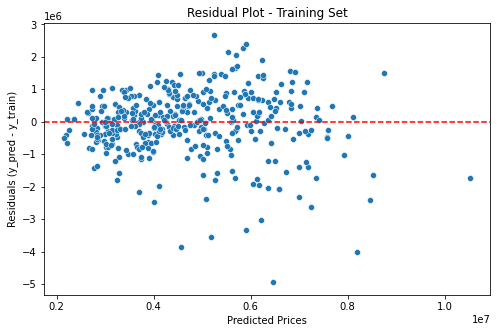

In [32]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_train_pred, y=train_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Training Set")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (y_pred - y_train)")
plt.show()

In [7]:
#14  Predic on the test set

y_test_pred = model.predict(X_test)

test_residuals = y_test_pred - y_test

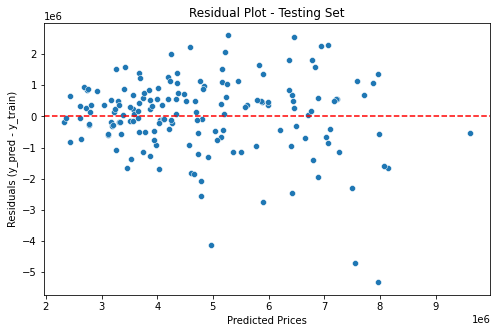

In [29]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred, y=test_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Testing Set")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (y_pred - y_train)")
plt.show()

In [30]:
#16 Print Mean Squared Error and R Squared Value

mse = mean_squared_error(y_test, y_test_pred)

r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error:", mse)
print("R Squared (R²):", r2)

Mean Squared Error: 1469989879709.4302
R Squared (R²): 0.658649247746737


In [31]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all

# Adjusted R Squared Value
n = X_test.shape[0]  # number of observations
k = X_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

print("Adjusted R Squared:", adj_r2)

Adjusted R Squared: 0.6290655158847875
